# **Supervised K-Nearest Neighbor Learning Project**
In order to better understand the workings of the k-nearest neighbor algorithm I started this personal project.


The k-nearest neighbor algorithm is a lazy classification algorithm meaning that it does not rely on training a model in order to make decisions. Instead, it just compares new data to old data it already has and classifies. In the case of k-nearest neighbor, we calculate the k closest points to some point x and classify x based on what each of these k points are. For this project, I will utilize both the Euclidean distance and Manhattan distance formulas.

## Overview

The focal point of this project will be determining whether a couple will divorce or stay together based on the individual's responses to a 54 question survey. For each question they will give an answer from 0-4. The dataset includes approximately the same proportion of responses from male and female individuals as well as approximately the same proportion of divorced and married individuals. This dataset was found on kaggle and will be made available via a link below or as a .csv included with this file.

## Introduction

The first step is to import all necessary libraries and data. We can use pandas for data storage as well as matploblib.pyplot for data visualization.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Noticed that I had to change ; to , in .csv
data = pd.read_csv('/content/sample_data/divorce.csv')
data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


For the sake of learning, let's create visuals for the data. Given that there are 54 different axes to account for, we cannot display the entirety of the data in one graph. We can create a scatterplot using only 2 of the axes and spot any trends. As we can see below, the data does seem to have some form of correlation/clustering even when comparing only 2 axes at a time.

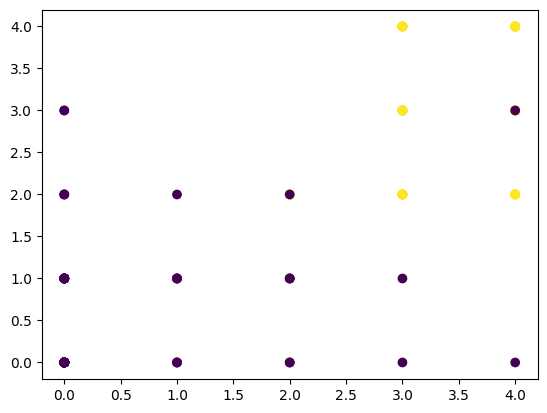

In [23]:
x = data.Atr1
y = data.Atr2
status = data.Class

plt.scatter(x, y, c=status)
plt.show()

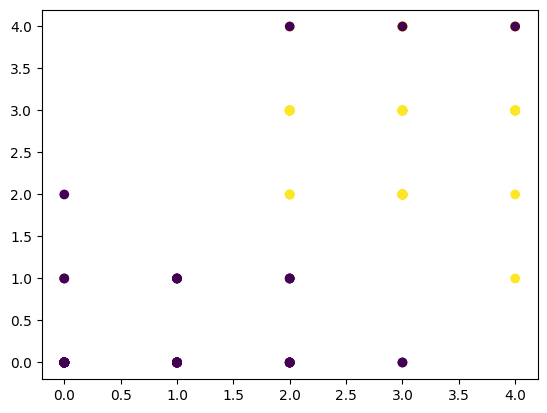

In [24]:
x = data.Atr3
y = data.Atr4

plt.scatter(x, y, c=status)
plt.show()

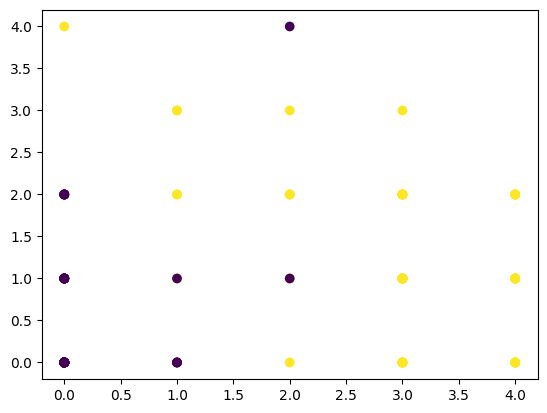

In [25]:
x = data.Atr5
y = data.Atr6

plt.scatter(x, y, c=status)
plt.show()

## Defining our Own Functions

The first function we will define is one that takes the Euclidean distance of two points. By entering two dataframes with an index specifying the column being used we can get all the necessary information. From there, just repeatedly solve for c^2 in the pythagorean theorem and take the square root at the end to get the overall distance. *Note: As the amount of axes increases, the Euclidean distance metric can become less reliable and as a result sometimes other formulas must be used.*

In [26]:
def euclideanDistance (dataframeOne, dataframeTwo, indexOne, indexTwo):
  distance = dataframeTwo.iloc[0,indexTwo] - dataframeOne.iloc[0,indexOne] # Distance in the case of 1D

  # Take the distance squared to prepare for pythagorean theorem
  distance *= distance

  # For each axis, calculate the new distance. Hard coded for the dataset
  for i in range(1, 54):
    distance = distance + ((dataframeTwo.iloc[i,indexTwo] - dataframeOne.iloc[i,indexOne]) ** 2)

  # Square root and return
  distance = distance ** .5
  return distance

The next function I wrote takes the Manhattan distance of two points. It works largely the same way as the function before but instead of squaring values it just takes the absolute value of the difference on each axis and sums them all together. I hope to see how the two algorithms compare further down.

In [27]:
def manhattanDistance (dataframeOne, dataframeTwo, indexOne, indexTwo):
  distance = abs(dataframeTwo.iloc[0,indexTwo] - dataframeOne.iloc[0,indexOne]) # One axis case

  # For each axis, calculate the new distance. Hard coded for the dataset
  for i in range(1, 54):
    distance = distance + abs(dataframeTwo.iloc[i,indexTwo] - dataframeOne.iloc[i,indexOne])

  return distance

As a part of the KNN algorithm, we need to be able to specify a k value to dictate how many points we want to look at. This function takes in a list of values and an integer to represent k. It will return a list of tuples which contain the index of the minimum value as well as the value itself. The value is not necessary to store but is kept for visualization and verification of the data.

In [28]:
def topX (ls, k):
  values = []

  # Create a tuple (index, value) and add it to a list
  for x in range(k):
    temp = (ls.index(min(ls)), min(ls)) # Store min as well for visualization of data
    values.append(temp)
    ls.remove(min(ls))

  #Return the list
  return values

This next function will classify whether the couple will split or stay together based on the data provided. It works by adding up the class values (either 0 for divorced or 1 for married) and then dividing by the total amount. Finally it rounds the value. This cuts down on later code redundancy.

In [29]:
def classify (dataframe, ls):
  # Set up prerequisite variables
  divisor = len(ls)
  dividend = 0

  # Add the class value to the dividend
  for i in range(divisor):
    dividend += dataframe.iloc[54,ls[i][0]]

  # Round to 1 or 0
  return round(dividend/divisor)

This final function takes the guessed values and actual values and determines the data like True Positive, False Positive, etc. It returns a tuple of structure (True Positive, False Positive, True Negative, False Negative). In this case, each one represents:

**True Positive** - algorithm predicts staying married and couple stays married

**False Positive** - algorithm predicts staying married and the couple divorces

**True Negative** - algorithm predicts a divorce and the couple divorces

**False Negative** - algorithm predicts a divorce and the couple stays married

In [30]:
def evaluate (testValues, actualValues):
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(testValues)):
    if testValues[i] == actualValues[i]:
      if testValues[i] == 0:
        TN += 1
      else:
        TP += 1
    else:
      if testValues[i] == 0:
        FN += 1
      else:
        FP += 1

  return (TP, FP, TN, FN)

## Data Sampling and Preparation

In order to test the KNN algorithm, we must split our data into training data and testing data (I called it input data since the model is not really 'training' rather just using givens and calculating). We can create two dataframes to store these two sections. I also transpose each of them to make the data management easier in other portions of code.

In [31]:
input_Data = data.sample(frac=0.8)
test_Data = data.drop(input_Data.index)


input_Data = input_Data.transpose()
test_Data = test_Data.transpose()

## Euclidean Distance

First, let's collect all of the distances of each point combination. This may take a while because there is a lot being calculated. The time complexity of something like this is ~ O(n^2) but if this needed to be scaled up and divide and conquer algorithm could be implemented.

After we do that, lets condense the list into the top k closest points for each point. In this instance we choose 5 but we can change the number if we'd like.

In [32]:
topDistancesforEachPoint = [] # Stores a list of lists holding top distances
for i in range(len(test_Data.columns)): # For every test point
  distances = []

  for j in range(len(input_Data.columns)): # For every input calculate and store distance
    distances.append(euclideanDistance(test_Data, input_Data, i, j))

  # Store the top 5 distances and append to the overall list
  distances = topX(distances, 5)
  topDistancesforEachPoint.append(distances)

topDistancesforEachPoint

[[(0, 9.486832980505138),
  (64, 9.486832980505138),
  (75, 10.583005244258363),
  (69, 10.63014581273465),
  (75, 10.63014581273465)],
 [(5, 0.0),
  (5, 3.1622776601683795),
  (53, 3.1622776601683795),
  (69, 3.1622776601683795),
  (90, 3.1622776601683795)],
 [(110, 0.0),
  (100, 3.1622776601683795),
  (101, 3.1622776601683795),
  (6, 3.3166247903554),
  (117, 3.3166247903554)],
 [(94, 2.23606797749979),
  (129, 3.0),
  (5, 3.872983346207417),
  (5, 3.872983346207417),
  (35, 3.872983346207417)],
 [(94, 2.23606797749979),
  (129, 3.0),
  (5, 3.872983346207417),
  (5, 3.872983346207417),
  (35, 3.872983346207417)],
 [(76, 1.0),
  (124, 2.23606797749979),
  (20, 3.1622776601683795),
  (36, 3.1622776601683795),
  (46, 3.1622776601683795)],
 [(76, 1.0),
  (124, 2.23606797749979),
  (20, 3.1622776601683795),
  (36, 3.1622776601683795),
  (46, 3.1622776601683795)],
 [(37, 2.23606797749979),
  (47, 2.23606797749979),
  (58, 2.23606797749979),
  (117, 2.23606797749979),
  (130, 2.236067977499

Now, let's give a classification to each point. All we have to do is run classify on each point and add them to an overall list.

In [33]:
classifications = []

for i in range(len(topDistancesforEachPoint)):
  classifications.append(classify(input_Data, topDistancesforEachPoint[i]))

classifications

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

This section of code is just getting the actual values from the dataframe and putting them in the same format as the classifications.

In [34]:
actual_Values = []
for i in range(len(test_Data.columns)):
  actual_Values.append(test_Data.iloc[54,i])

actual_Values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Finally, run the results function to get our tuple of data. These results will then be used to calculate accuracy, precision, and recall.

In [35]:
results = evaluate(classifications, actual_Values)
print("Accuracy: " + str((results[0] + results[2]) / (results[0] + results[1] + results[2] + results[3])))
print("Precision: " + str(results[0] / (results[0] + results[1])))
print("Recall: " + str(results[0] / (results[0] + results[3])))

Accuracy: 0.8823529411764706
Precision: 0.8888888888888888
Recall: 0.8888888888888888


As we can see by the data, ~88% of the classification the model made were correct. This paired with a similar precision means that the model is pretty reliable when it predicts whether a couple will stay together.

## Manhattan Distance

Most of this section will be the same as before. In this we are collecting all of the distances and then storing the top 5.

In [36]:
topDistancesforEachPoint = [] # Stores a list of lists holding top distances
for i in range(len(test_Data.columns)): # For every test point
  distances = []

  for j in range(len(input_Data.columns)): # For every input calculate and store distance
    distances.append(manhattanDistance(test_Data, input_Data, i, j))

  # Store the top 5 distances and append to the overall list
  distances = topX(distances, 5)
  topDistancesforEachPoint.append(distances)

topDistancesforEachPoint

[[(0, 50), (64, 50), (11, 56), (68, 57), (73, 58)],
 [(5, 0), (5, 10), (53, 10), (69, 10), (90, 10)],
 [(110, 0), (100, 10), (101, 10), (6, 11), (117, 11)],
 [(94, 5), (129, 9), (5, 15), (5, 15), (35, 15)],
 [(94, 5), (129, 9), (5, 15), (5, 15), (35, 15)],
 [(76, 1), (124, 5), (20, 10), (36, 10), (46, 10)],
 [(76, 1), (124, 5), (20, 10), (36, 10), (46, 10)],
 [(37, 5), (47, 5), (58, 5), (117, 5), (130, 5)],
 [(35, 5), (45, 5), (98, 5), (37, 6), (9, 10)],
 [(79, 15), (15, 16), (105, 16), (16, 17), (18, 18)],
 [(79, 10), (76, 12), (104, 16), (122, 18), (15, 21)],
 [(130, 19), (79, 20), (37, 23), (47, 23), (91, 23)],
 [(90, 1), (9, 5), (41, 10), (37, 11), (57, 11)],
 [(110, 52), (6, 53), (119, 53), (101, 56), (28, 60)],
 [(21, 11), (52, 11), (72, 11), (77, 11), (32, 21)],
 [(106, 10), (9, 13), (14, 15), (104, 15), (77, 16)],
 [(79, 11), (21, 14), (52, 14), (72, 14), (76, 14)],
 [(111, 8), (77, 41), (65, 43), (10, 48), (33, 49)],
 [(88, 17), (18, 19), (2, 21), (41, 21), (87, 21)],
 [(108, 

Now we are classifying all of the test points and storing them.

In [37]:
classifications = []

for i in range(len(topDistancesforEachPoint)):
  classifications.append(classify(input_Data, topDistancesforEachPoint[i]))

classifications

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Finally we display the results.

In [38]:
results = evaluate(classifications, actual_Values)
print("Accuracy: " + str((results[0] + results[2]) / (results[0] + results[1] + results[2] + results[3])))
print("Precision: " + str(results[0] / (results[0] + results[1])))
print("Recall: " + str(results[0] / (results[0] + results[3])))

Accuracy: 0.8529411764705882
Precision: 0.8823529411764706
Recall: 0.8333333333333334


These results are fairly good too. Running it a few times I find that it runs either as well as the Euclidean distance or a little bit worse. In both cases it runs better than random guessing would which is a good sign.

## Results

I started this project as an introduction to using python for basic AI purposes. In that vein, this project was a major success. I got experience managing dataframes with pandas, planning a project from start to finish, doing mathematics for higher dimensions that I am used to, and most importantly learned the fundamentals of the KNN algorithm. In the end I had functioning code to calculate this dataset and with minor changes I could abstract this code to work for any other. Overall it was an enjoyable experience.